In [36]:
#importing the necessary libraries
import pandas as pd 
import numpy as np
from math import * 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

#### Looking at the Data

In [2]:
df_train=pd.read_csv("churn-bigml-80.csv")#read the csv for train dataset
df_test=pd.read_csv("churn-bigml-20.csv")#read the csv for test dataset
df_train.head()#look at the first few rows for the train dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df_test.head()#look at the first few rows for the test dataset

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [67]:
print("Rows in Train:", df_train.shape[0])#Getting number of Rows
print("\nNumber of Columns in Train:", df_train.shape[1])#Getting number of Columns
print ("\nFeatures : \n" ,df_train.columns.tolist())#Getting the column names

Rows in Train: 2666

Number of Columns in Train: 20

Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [66]:
print("Rows in Test:", df_test.shape[0])#Getting number of Rows
print("\nNumber of Columns in Test:", df_test.shape[1])#Getting number of Columns
print ("\nFeatures : \n" ,df_test.columns.tolist())#Getting the column names

Rows in Test: 667

Number of Columns in Test: 20

Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [115]:
df_train.info() #looking to see the count of NAN in each column for train and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [116]:
df_test.info() #looking to see the count of NAN in each column for test and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

Therefore, from both of the datasets there are zero missing values.

#### Exploratory Data Analysis

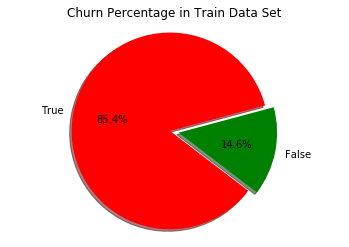

In [12]:
Churn_Train = df_train['Churn'].value_counts()#choosing the data in the Churn column to graph
my_labels = 'True','False'
my_colors = ['red','green']
my_explode = (0, 0.09)
plt.pie(Churn_Train,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Churn Percentage in Train Data Set')
plt.axis('equal')
plt.show()

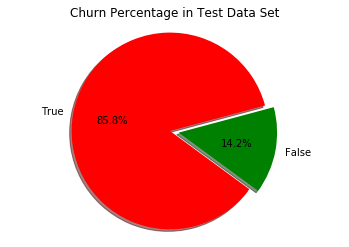

In [13]:
Churn_Test = df_test['Churn'].value_counts()#choosing the data in the Churn column to graph
my_labels = 'True','False'
my_colors = ['red','green']
my_explode = (0, 0.09)
plt.pie(Churn_Test,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Churn Percentage in Test Data Set')
plt.axis('equal')
plt.show()

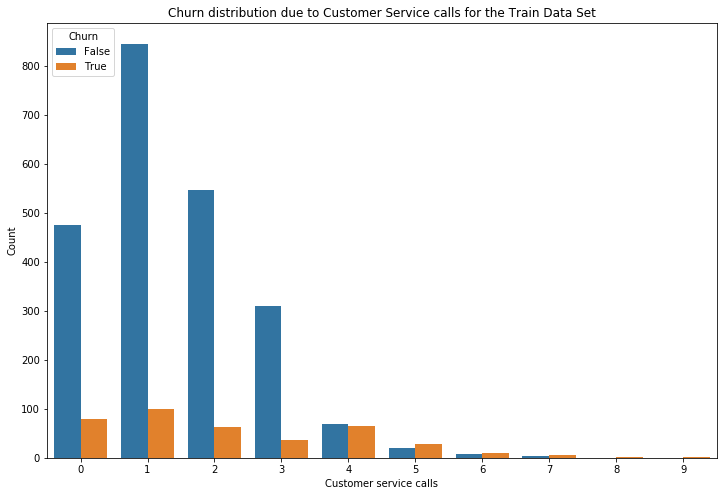

In [101]:
plt.figure(figsize=(12,8))#establishing figure size
sns.countplot(x ='Customer service calls', hue = "Churn", data = df_train) #using seaborn to do countpolot
plt.title('Churn distribution due to Customer Service calls for the Train Data Set')
plt.xlabel('Customer service calls')
plt.ylabel('Count') 
plt.show() # Show the plot 

From looking at the graph from the train dataset some customers left the network without even making a service call, and on the other hand more customers left after making one service call probably because their issue wasn't solved after the first call. Also its evident to see that after making 4 service calls or higher, the customer is more likely to leave the network and churn.

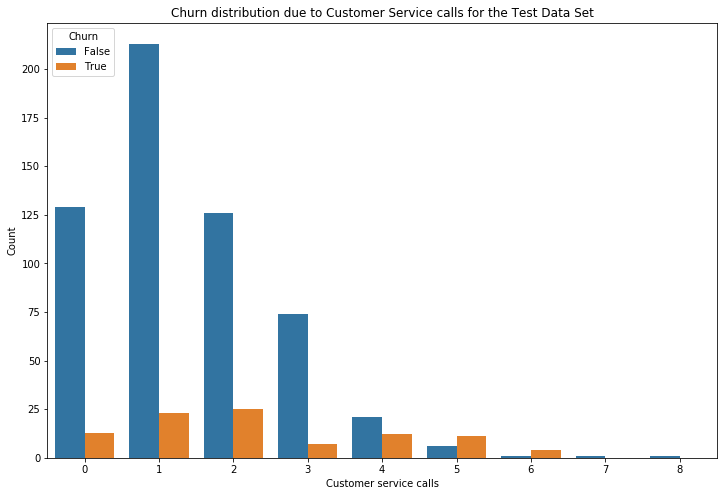

In [103]:
plt.figure(figsize=(12,8))#establishing figure size
sns.countplot(x ='Customer service calls', hue = "Churn", data = df_test) #using seaborn to do countpolot
plt.title('Churn distribution due to Customer Service calls for the Test Data Set')
plt.xlabel('Customer service calls')
plt.ylabel('Count') 
plt.show() # Show the plot

From looking at the graph from the test dataset some customers left the network without even making a service call, and on the other hand most customers left after making one or two service calls. Also its evident to see that after making 5 service calls or higher, the customer is more likely to leave the network and churn.

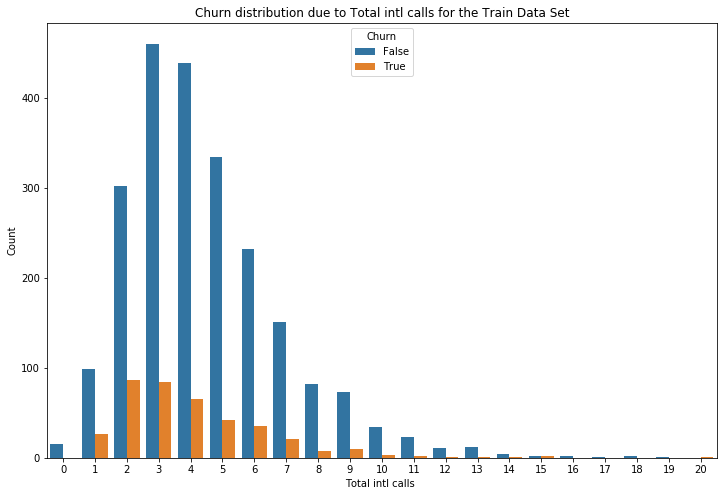

In [114]:
#Going to create the bar chart for the Churn for the train dataset showcasing the Total intl calls 
plt.figure(figsize=(12,8))#establishing figure size
sns.countplot(x ='Total intl calls', hue = "Churn", data = df_train) #using seaborn to do countpolot
plt.title('Churn distribution due to Total intl calls for the Train Data Set')
plt.xlabel('Total intl calls ')
plt.ylabel('Count') 
plt.show() # Show the plot

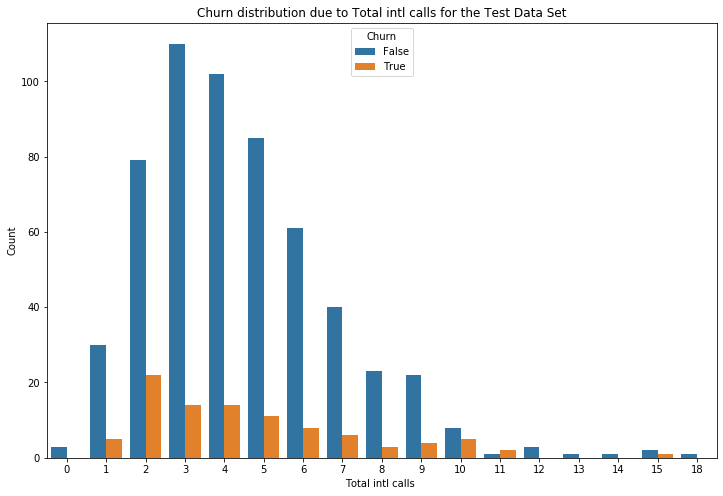

In [113]:
#Going to create the bar chart for the Churn for the test dataset showcasing the Total intl calls 
plt.figure(figsize=(12,8))#establishing figure size
sns.countplot(x ='Total intl calls', hue = "Churn", data = df_test) #using seaborn to do countpolot
plt.title('Churn distribution due to Total intl calls for the Test Data Set')
plt.xlabel('Total intl calls ')
plt.ylabel('Count') 
plt.show() # Show the plot

In [23]:
#creating a new dataframe without some of the categorical columns
new_train = df_train[["Number vmail messages","Total day minutes","Total day calls","Total day charge","Total eve minutes","Total eve calls","Total eve charge","Total night minutes","Total night calls","Total night charge","Total intl minutes","Total intl calls","Total intl charge","Customer service calls","Churn"]]
new_train.head()

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


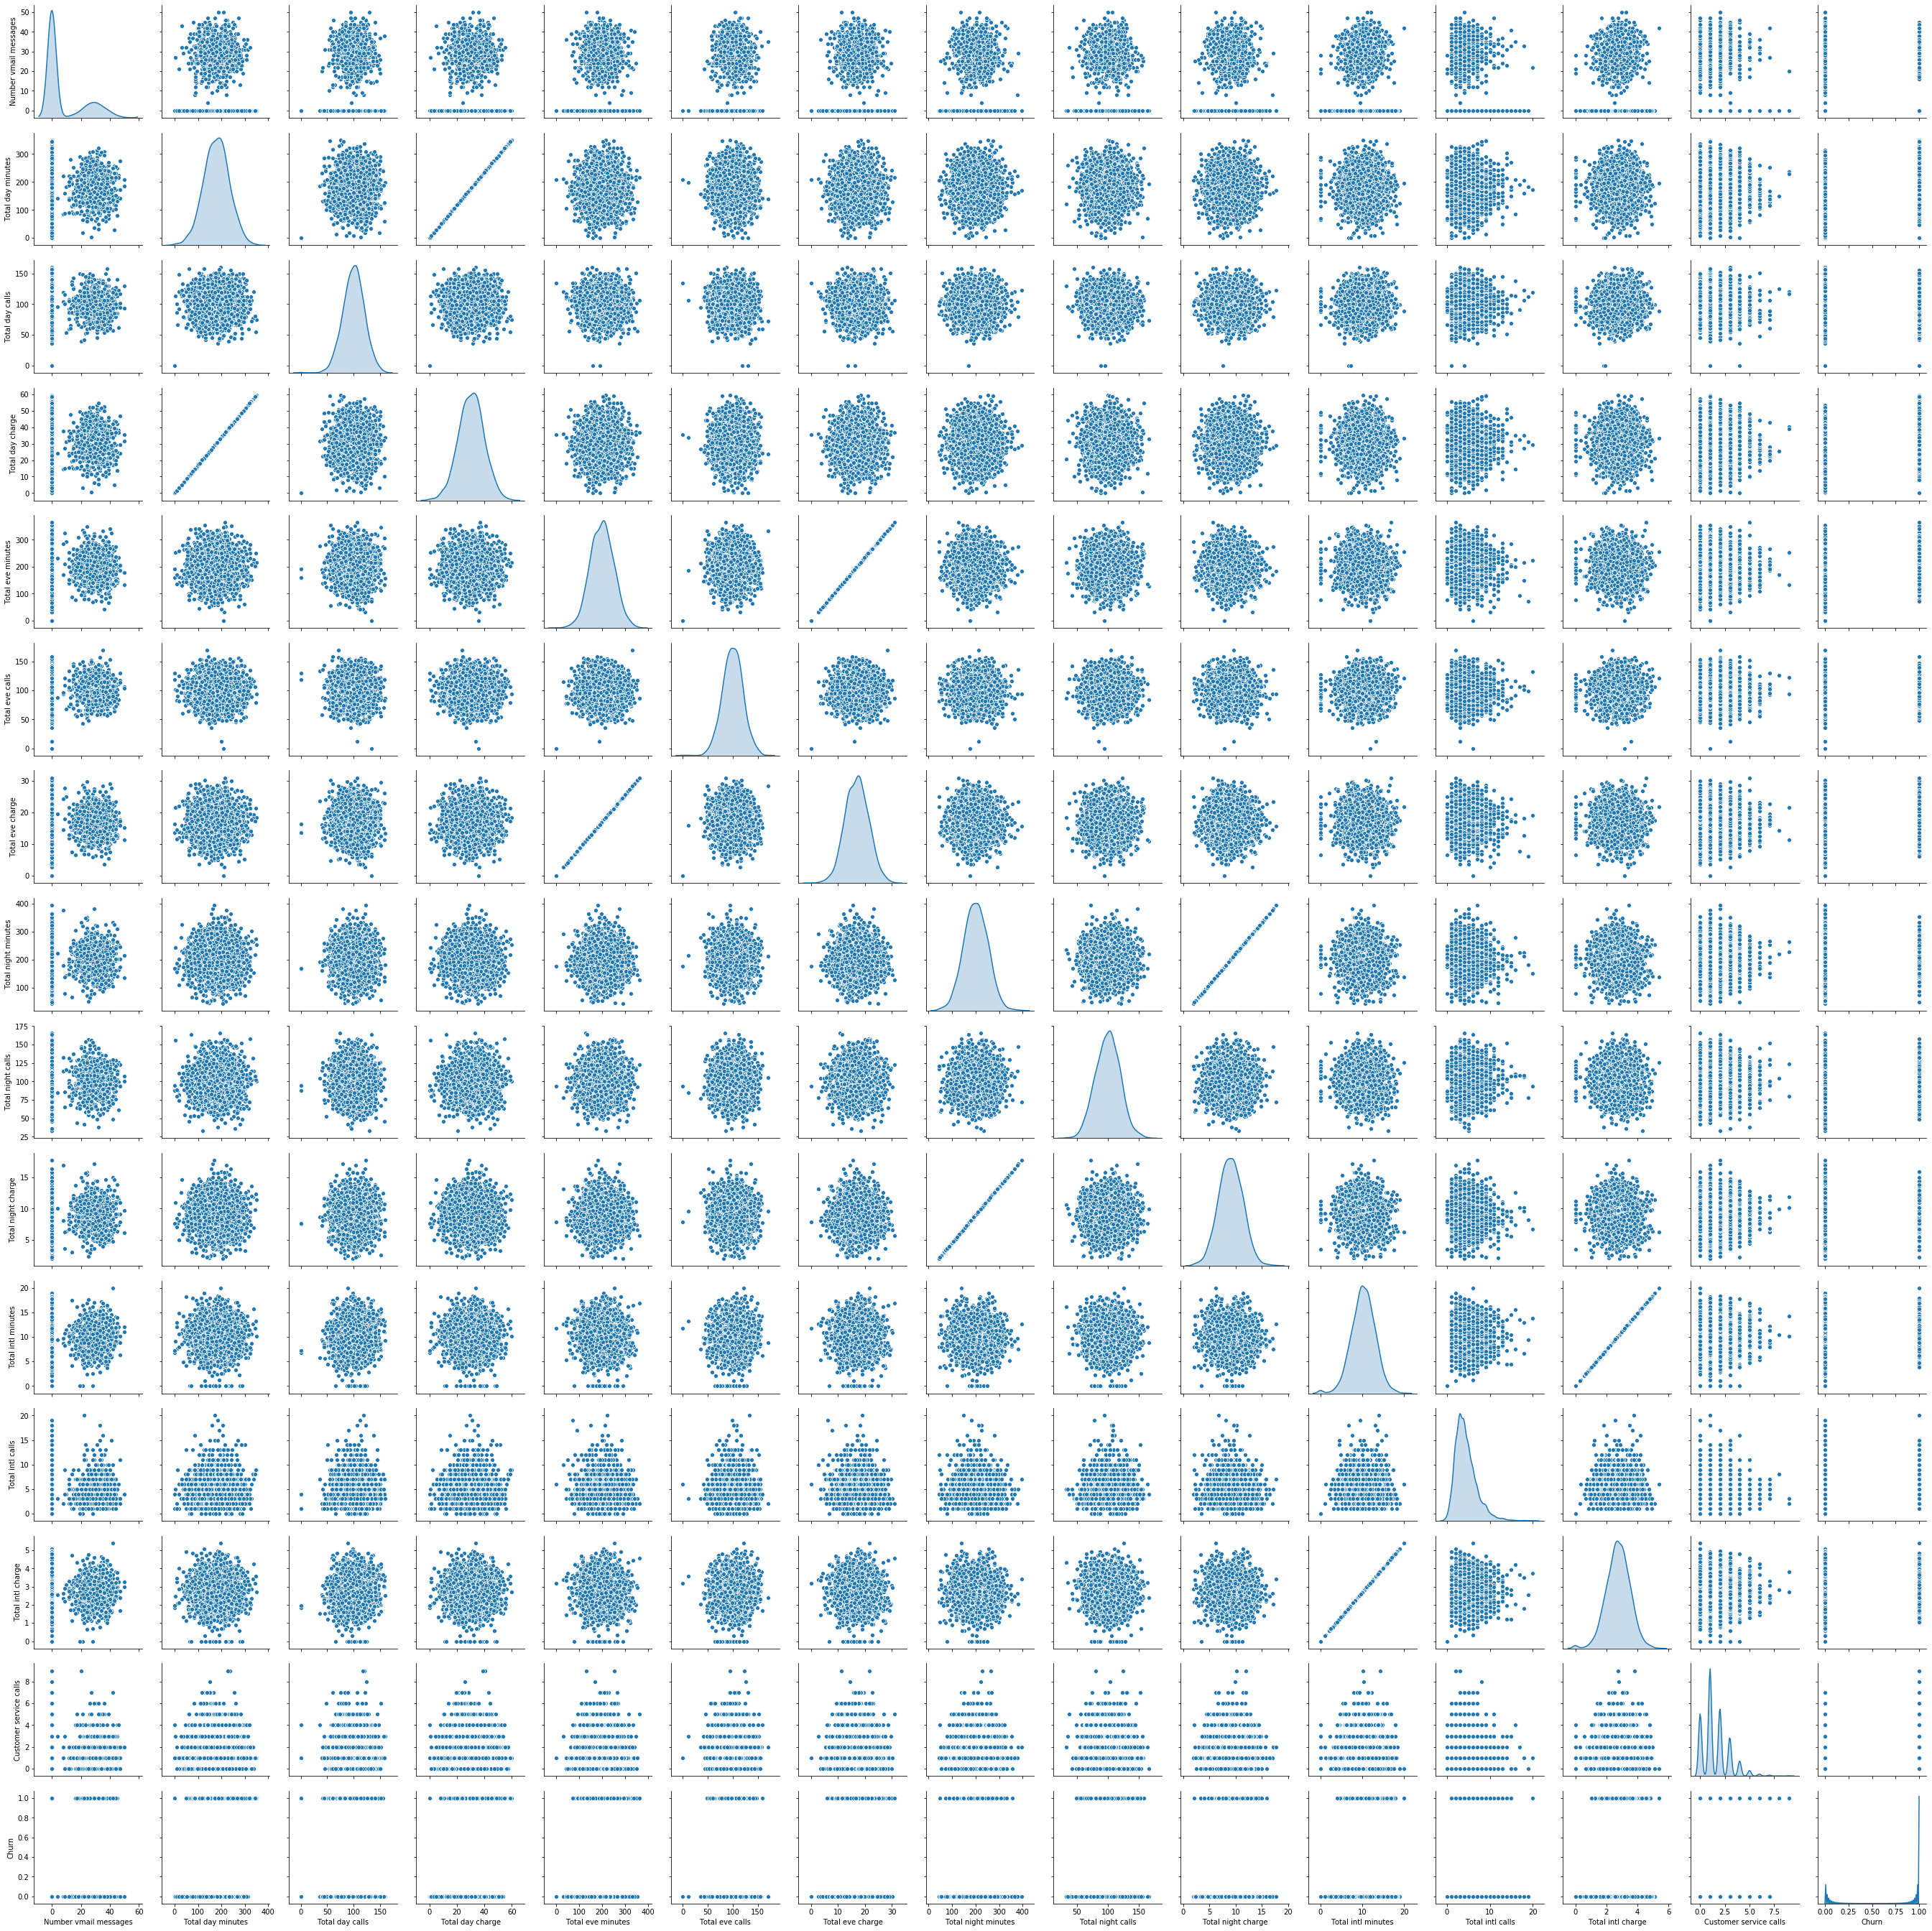

In [18]:
sns.pairplot(new_train, diag_kind="kde")#visualizing the relationships for each pair of columns
plt.show()

Observing the distributions, it clear to see that most of the graphs don't show any correlation/relationship. However few does show some postive correlation, such as the Total day minutes and Total day charge, Total eve minutes and Total eve charge, Total night minutes and Total night charge and finally the Total intl minutes and Total intl charge show a postive correlation.

#### Preprocessing of Data

In [20]:
print("Rows in Test:", new_train.shape[0])#Getting number of Rows
print("\nNumber of Columns in Test:", new_train.shape[1])#Getting number of Columns

Rows in Test: 2666

Number of Columns in Test: 15


Similarly will narrow down the columns for the test dataset as well.

In [57]:
#creating a new dataframe without some of the categorical columns
new_test = df_test[["Number vmail messages","Total day minutes","Total day calls","Total day charge","Total eve minutes","Total eve calls","Total eve charge","Total night minutes","Total night calls","Total night charge","Total intl minutes","Total intl calls","Total intl charge","Customer service calls","Churn"]]
new_test.head(15)

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
5,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False
6,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False
7,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
8,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False
9,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False


In [22]:
print("Rows in Test:", new_test.shape[0])#Getting number of Rows
print("\nNumber of Columns in Test:", new_test.shape[1])#Getting number of Columns

Rows in Test: 667

Number of Columns in Test: 15


Now have to establish the attributes and lables for the model going forward.

In [29]:
x_train = new_train.iloc[:, :-1].values #selecting the all the columns except the last one
y_train = new_train.iloc[:, 14].values #selecting the churn column

x_test = new_test.iloc[:, :-1].values #selecting the all the columns except the last one 
y_test = new_test.iloc[:, 14].values #selecting the churn column

#### Feature Scaling

Best practice is to scale the features/columns so the rage is normalized.

In [32]:
from sklearn.preprocessing import StandardScaler #importing the libray
scaler = StandardScaler()#assigning the function
scaler.fit(x_train)#using the .fit on teh xtrain dataset

X_train = scaler.transform(x_train) #transforming the xtrain
X_test = scaler.transform(x_test) #transforming the xtest

#### Training the Data and Predicting 

In [60]:
from sklearn.neighbors import KNeighborsClassifier #importing the library
classifier = KNeighborsClassifier(n_neighbors=7) #assinging the function to a classfifier varible
classifier.fit(X_train, y_train) #calling the function on Xtrain and y train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [108]:
y_pred = classifier.predict(X_test) #using the y_pred on the Xtest
print(len(y_pred))#printing the length of the prediction for churn
print(y_pred) #printing the predicted values from the algorithem for churn

667
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False  True False False False
 False False  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False  True False False  True False False False False False  True
 False False False False False False False  Tru

#### Eavaluating the Algorithm

In [44]:
from sklearn.metrics import classification_report, confusion_matrix #importing the library
print(confusion_matrix(y_test, y_pred)) #using the confusing matrix funtion to describe the functionality of the classifier
print(classification_report(y_test, y_pred))

[[568   4]
 [ 63  32]]
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       572
        True       0.89      0.34      0.49        95

    accuracy                           0.90       667
   macro avg       0.89      0.66      0.72       667
weighted avg       0.90      0.90      0.88       667



Text(0.5, 1, 'KNN Classifier')

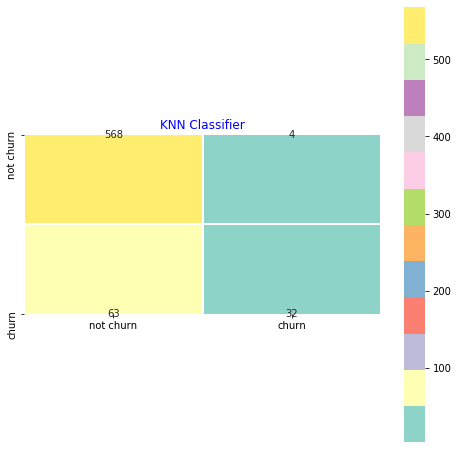

In [100]:
#creating a visual for the confusion matrix
fig = plt.figure(figsize=(8,8))
confmatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confmatrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 1,linecolor = "w",cmap = "Set3")
plt.title("KNN Classifier",color = "b")



#### Error Rate comparison with the K value

In [50]:
error = [] #creating an empty error list

# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

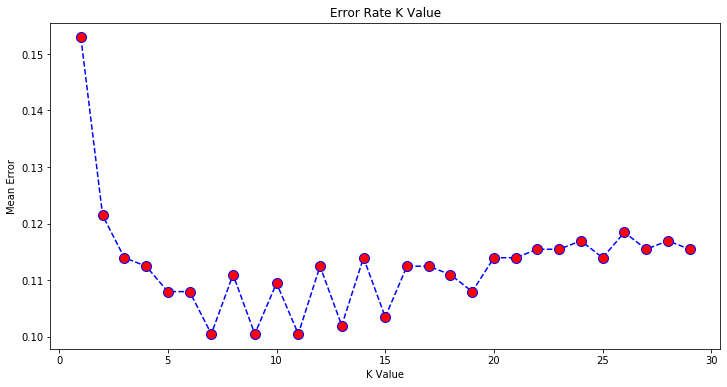

In [54]:
#creating a plot for the Error rate of the K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From observing the graph it is evident that the mean error is at the lowest level of 0.10 when the K is 7, 9, and 11. The algorithm used a K or the n_neighbours value of 7, which showed an accuracy of 90%. 

#### Evaluating the results from the Algorithm 

In [105]:
#creating a new dataframe with the new test and going to add the y_pred list to it
pred_test = new_test[["Number vmail messages","Total day minutes","Total day calls","Total day charge","Total eve minutes","Total eve calls","Total eve charge","Total night minutes","Total night calls","Total night charge","Total intl minutes","Total intl calls","Total intl charge","Customer service calls","Churn"]]
pred_test['KNN_Churn'] = y_pred #adding the predicted churn in the dataset
pred_test.head(15) #showing the first 15 rows

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,KNN_Churn
0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,False
1,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,False
2,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,False
3,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,False
4,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,False
5,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,False,False
6,0,211.3,120,35.92,162.6,122,13.82,134.7,118,6.06,13.2,5,3.56,3,False,False
7,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True,True
8,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,False,False
9,0,148.8,70,25.30,246.5,164,20.95,129.8,103,5.84,12.1,3,3.27,3,False,False


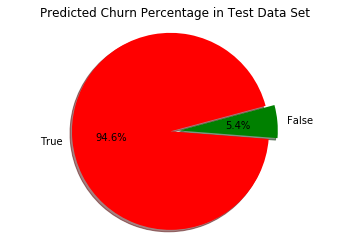

In [107]:
#Going to create the pie chart for the predicted KNN Churn for the test dataset
Churn_Test_pred = pred_test['KNN_Churn'].value_counts()#choosing the data in the Churn column to graph
my_labels = 'True','False'
my_colors = ['red','green']
my_explode = (0, 0.09)
plt.pie(Churn_Test_pred,labels=my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Predicted Churn Percentage in Test Data Set')
plt.axis('equal')
plt.show()

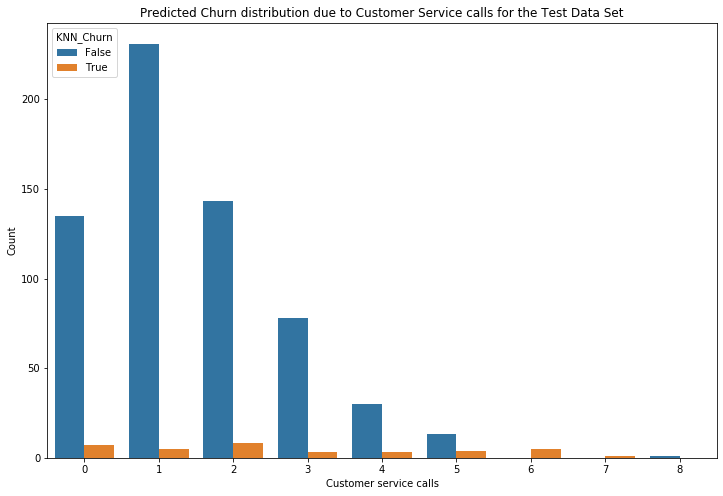

In [109]:
#Going to create the bar chart for the predicted KNN Churn for the test dataset showcasing the Customer service calls
plt.figure(figsize=(12,8))#establishing figure size
sns.countplot(x ='Customer service calls', hue = "KNN_Churn", data = pred_test) #using seaborn to do countpolot
plt.title('Predicted Churn distribution due to Customer Service calls for the Test Data Set')
plt.xlabel('Customer service calls')
plt.ylabel('Count') 
plt.show() # Show the plot

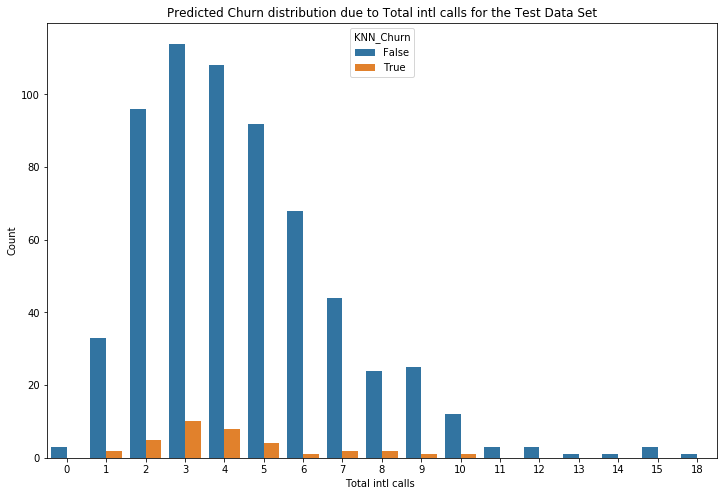

In [112]:
#Going to create the bar chart for the predicted KNN Churn for the test dataset showcasing the Total intl calls 
plt.figure(figsize=(12,8))#establishing figure size
sns.countplot(x ='Total intl calls', hue = "KNN_Churn", data = pred_test) #using seaborn to do countpolot
plt.title('Predicted Churn distribution due to Total intl calls for the Test Data Set')
plt.xlabel('Total intl calls ')
plt.ylabel('Count') 
plt.show() # Show the plot

..............................................................................................................................................................................

######  Reference
Article Name: K-Nearest Neighbors Algorithm in Python and Scikit-Learn
URL: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/ 

##### Data Source
Data Source Link- https://www.kaggle.com/mnassrib/telecom-churn-datasets
This is a public use data set, which is updated annually
Dataset owner- Baligh Mnassri
